### What are decision trees?
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels. Whether or not all data points are classified as homogenous sets is largely dependent on the complexity of the decision tree. Smaller trees are more easily able to attain pure leaf nodes—i.e. data points in a single class.

<b>Dataset : </b>From the DAAG R package: "The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland." (Kaggle)

<b>Task    : </b>Predict the age based on characteristics from the dataset.

In [28]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# load data
df = pd.read_csv('possum.csv')
df.head(4)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0


In [30]:
# Clean dataset
df.dropna(inplace=True)

# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [31]:
# remove irrelevant features and store only relevant features in X and age in y (output/ labels in this case for training)
X = df.drop(["case", "site", "Pop", "sex", "age"], axis=1)
y = df["age"]

In [37]:
# creating train-test splits (25% for test and 75% for training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

### random_state ... a parameter always ignored.
The test-train splits are always random. And hence everytime you run the code you could get a different set of train-test split. Which further produces different results everytime.

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 44 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

Please note that even though your computers generate random numbers, they are always not random since computers are deterministic in a way that they generate these numbers via a set of algorithms.

In [38]:
# importing the decision tree model
from sklearn.tree import DecisionTreeRegressor

# train and fit the model
model = DecisionTreeRegressor(random_state=44).fit(X_train, y_train)

In [39]:
# predict the outputs (age) on test set
predictions = model.predict(X_test)
print(predictions)

[4. 2. 6. 4. 2. 5. 5. 1. 2. 2. 3. 7. 3. 4. 3. 6. 2. 2. 2. 1. 4. 2. 2. 3.
 3. 5.]


In [40]:
# original outputs
print(y_test.values)

[3. 3. 4. 5. 3. 7. 6. 2. 3. 3. 1. 3. 1. 6. 4. 3. 3. 2. 5. 1. 3. 3. 1. 4.
 6. 4.]


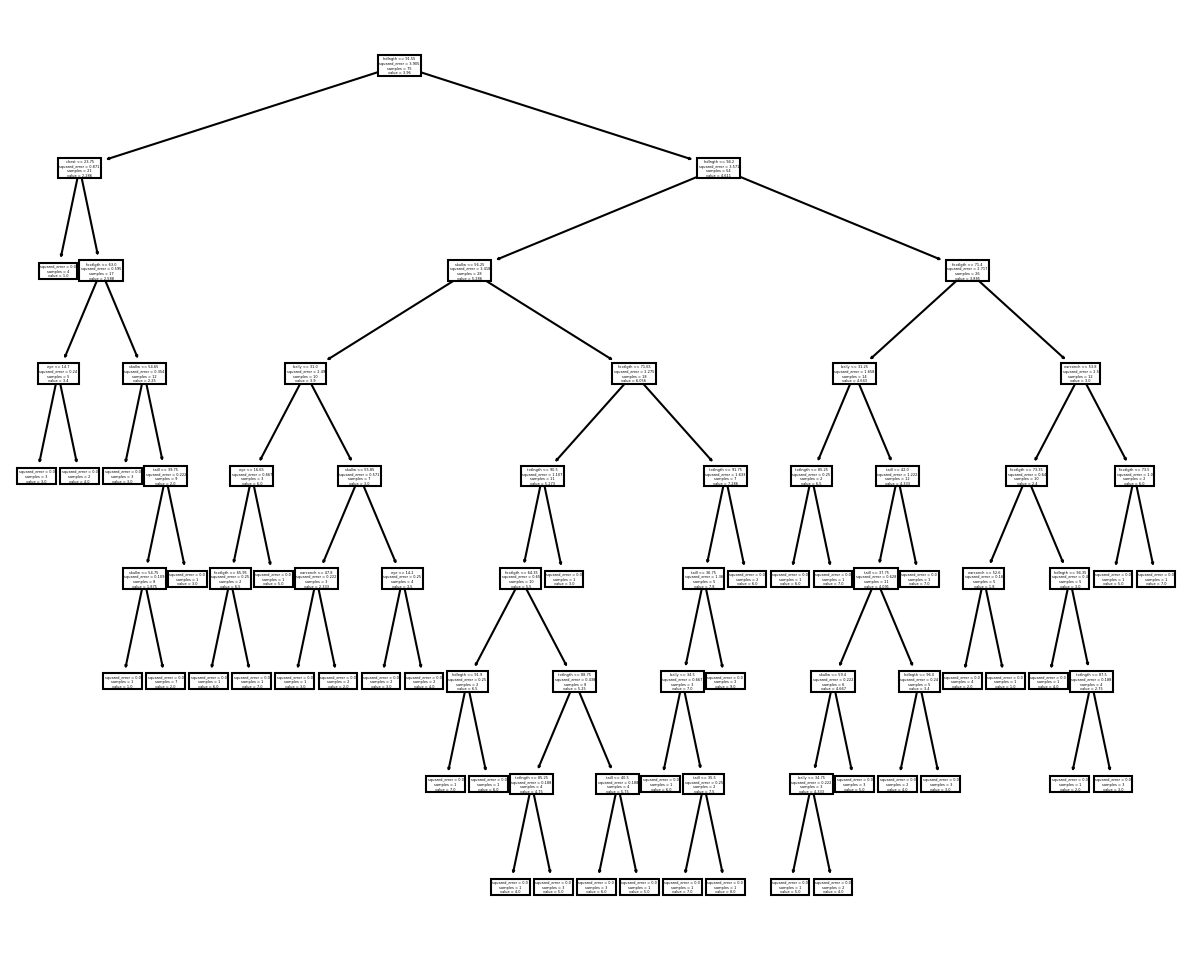

In [41]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);